<a href="https://colab.research.google.com/github/rakeshvitta/rakeshvitta/blob/main/Group250_Anamoly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>
<b>Team:</b>

NAVIN APPUKUTTAN NAIR - 2021fc04720

N VISWANATHAN - 2021fc04318

RAKESH VITTA - 2021fc04673

**Dataset:** Anamoly Detection

Location of the Dataset: https://drive.google.com/file/d/1n3hnxH9FPlGJVrbJgXr0fcLpNOvVDJQ-/view?usp=sharing 
</h1>

<h2>Importing Libraries</h2>

In [257]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, classification_report
import itertools
from sklearn.preprocessing import normalize
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

%matplotlib inline

<h2>Import Dataset into the Notebook</h2>

In [258]:
url = 'https://raw.githubusercontent.com/rakeshvitta/rakeshvitta/main/Anamoly.csv'
df = pd.read_csv(url)

<h1>1. Data Visualization and Exploration</h1>








<h2>1.1. Print 2 rows for sanity check</h2>

In [259]:
pd.set_option('display.max_columns', None)
df.head(2)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.0,1.0,1.0,0.04,0.06,0.0,255.0,10.0,0.04,0.06,0.0,0.0,0.0,0.0,1.0,1.0,anomaly
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.0,1.0,1.0,0.01,0.06,0.0,255.0,1.0,0.00,0.06,0.0,0.0,0.0,0.0,1.0,1.0,anomaly


In [260]:
df.describe(include = 'all')

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
count,22544.000000,22544,22544,22544,2.254400e+04,2.254400e+04,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.0,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22531.000000,22532.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544
unique,NaN,3,64,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,tcp,http,SF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,anomaly
freq,NaN,18880,7853,14875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12833
mean,218.859076,NaN,NaN,NaN,1.039545e+04,2.056019e+03,0.000311,0.008428,0.105394,0.021647,0.442202,0.119899,0.002440,0.000266,0.114665,0.008738,0.001153,0.003549,0.0,0.028433,79.028345,31.124379,0.102924,0.103635,0.238463,0.235179,0.740345,0.094074,0.098110,193.863965,140.752663,0.608722,0.090540,0.132261,0.019638,0.097814,0.099426,0.233385,0.226683,NaN
std,1407.176612,NaN,NaN,NaN,4.727864e+05,2.121930e+04,0.017619,0.142599,0.928428,0.150328,0.496659,7.269597,0.049334,0.021060,8.041614,0.676842,0.048014,0.067829,0.0,0.166211,128.539248,89.062532,0.295367,0.298332,0.416118,0.416215,0.412496,0.259138,0.253545,94.042593,111.786948,0.435688,0.220717,0.306268,0.085394,0.273139,0.281866,0.387229,0.400875,NaN
min,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,121.000000,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,0.000000,NaN,NaN,NaN,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,8.000000,6.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,0.000000,NaN,NaN,NaN,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,123.250000,16.000000,0.000000,0.000000,0.250000,0.072500,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000,NaN


Summary: Based on the above the target matches the dataset loaded here.

<h2>1.2. Comment on class imbalance with appropriate visualization method.</h2>

In [261]:
#Check the data type of the class and printing the values it takes and counts for each value
df['class'].dtypes
df['class'].value_counts()

anomaly    12833
normal      9711
Name: class, dtype: int64

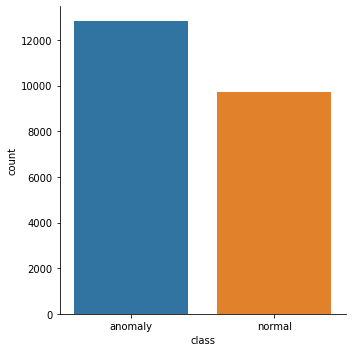

In [262]:
#Looking at the values the dataset is not imbalanced. Visualize the balance:
plot = sns.catplot(x="class", kind="count",  data=df)

From the plot, we can see that **Anomaly** rows are slighly more than **Normal** rows unlike typically anomalies which are a very small portion of the dataset. Hence the dataset has no significant imbalance between the classes (approx 55:45 split for Anomaly vs Normal) in the given data set





<h2>1.3. Provide appropriate visualizations to get an insight about the dataset.</h2>




> Visualizing different features/columns to see the values and distribution



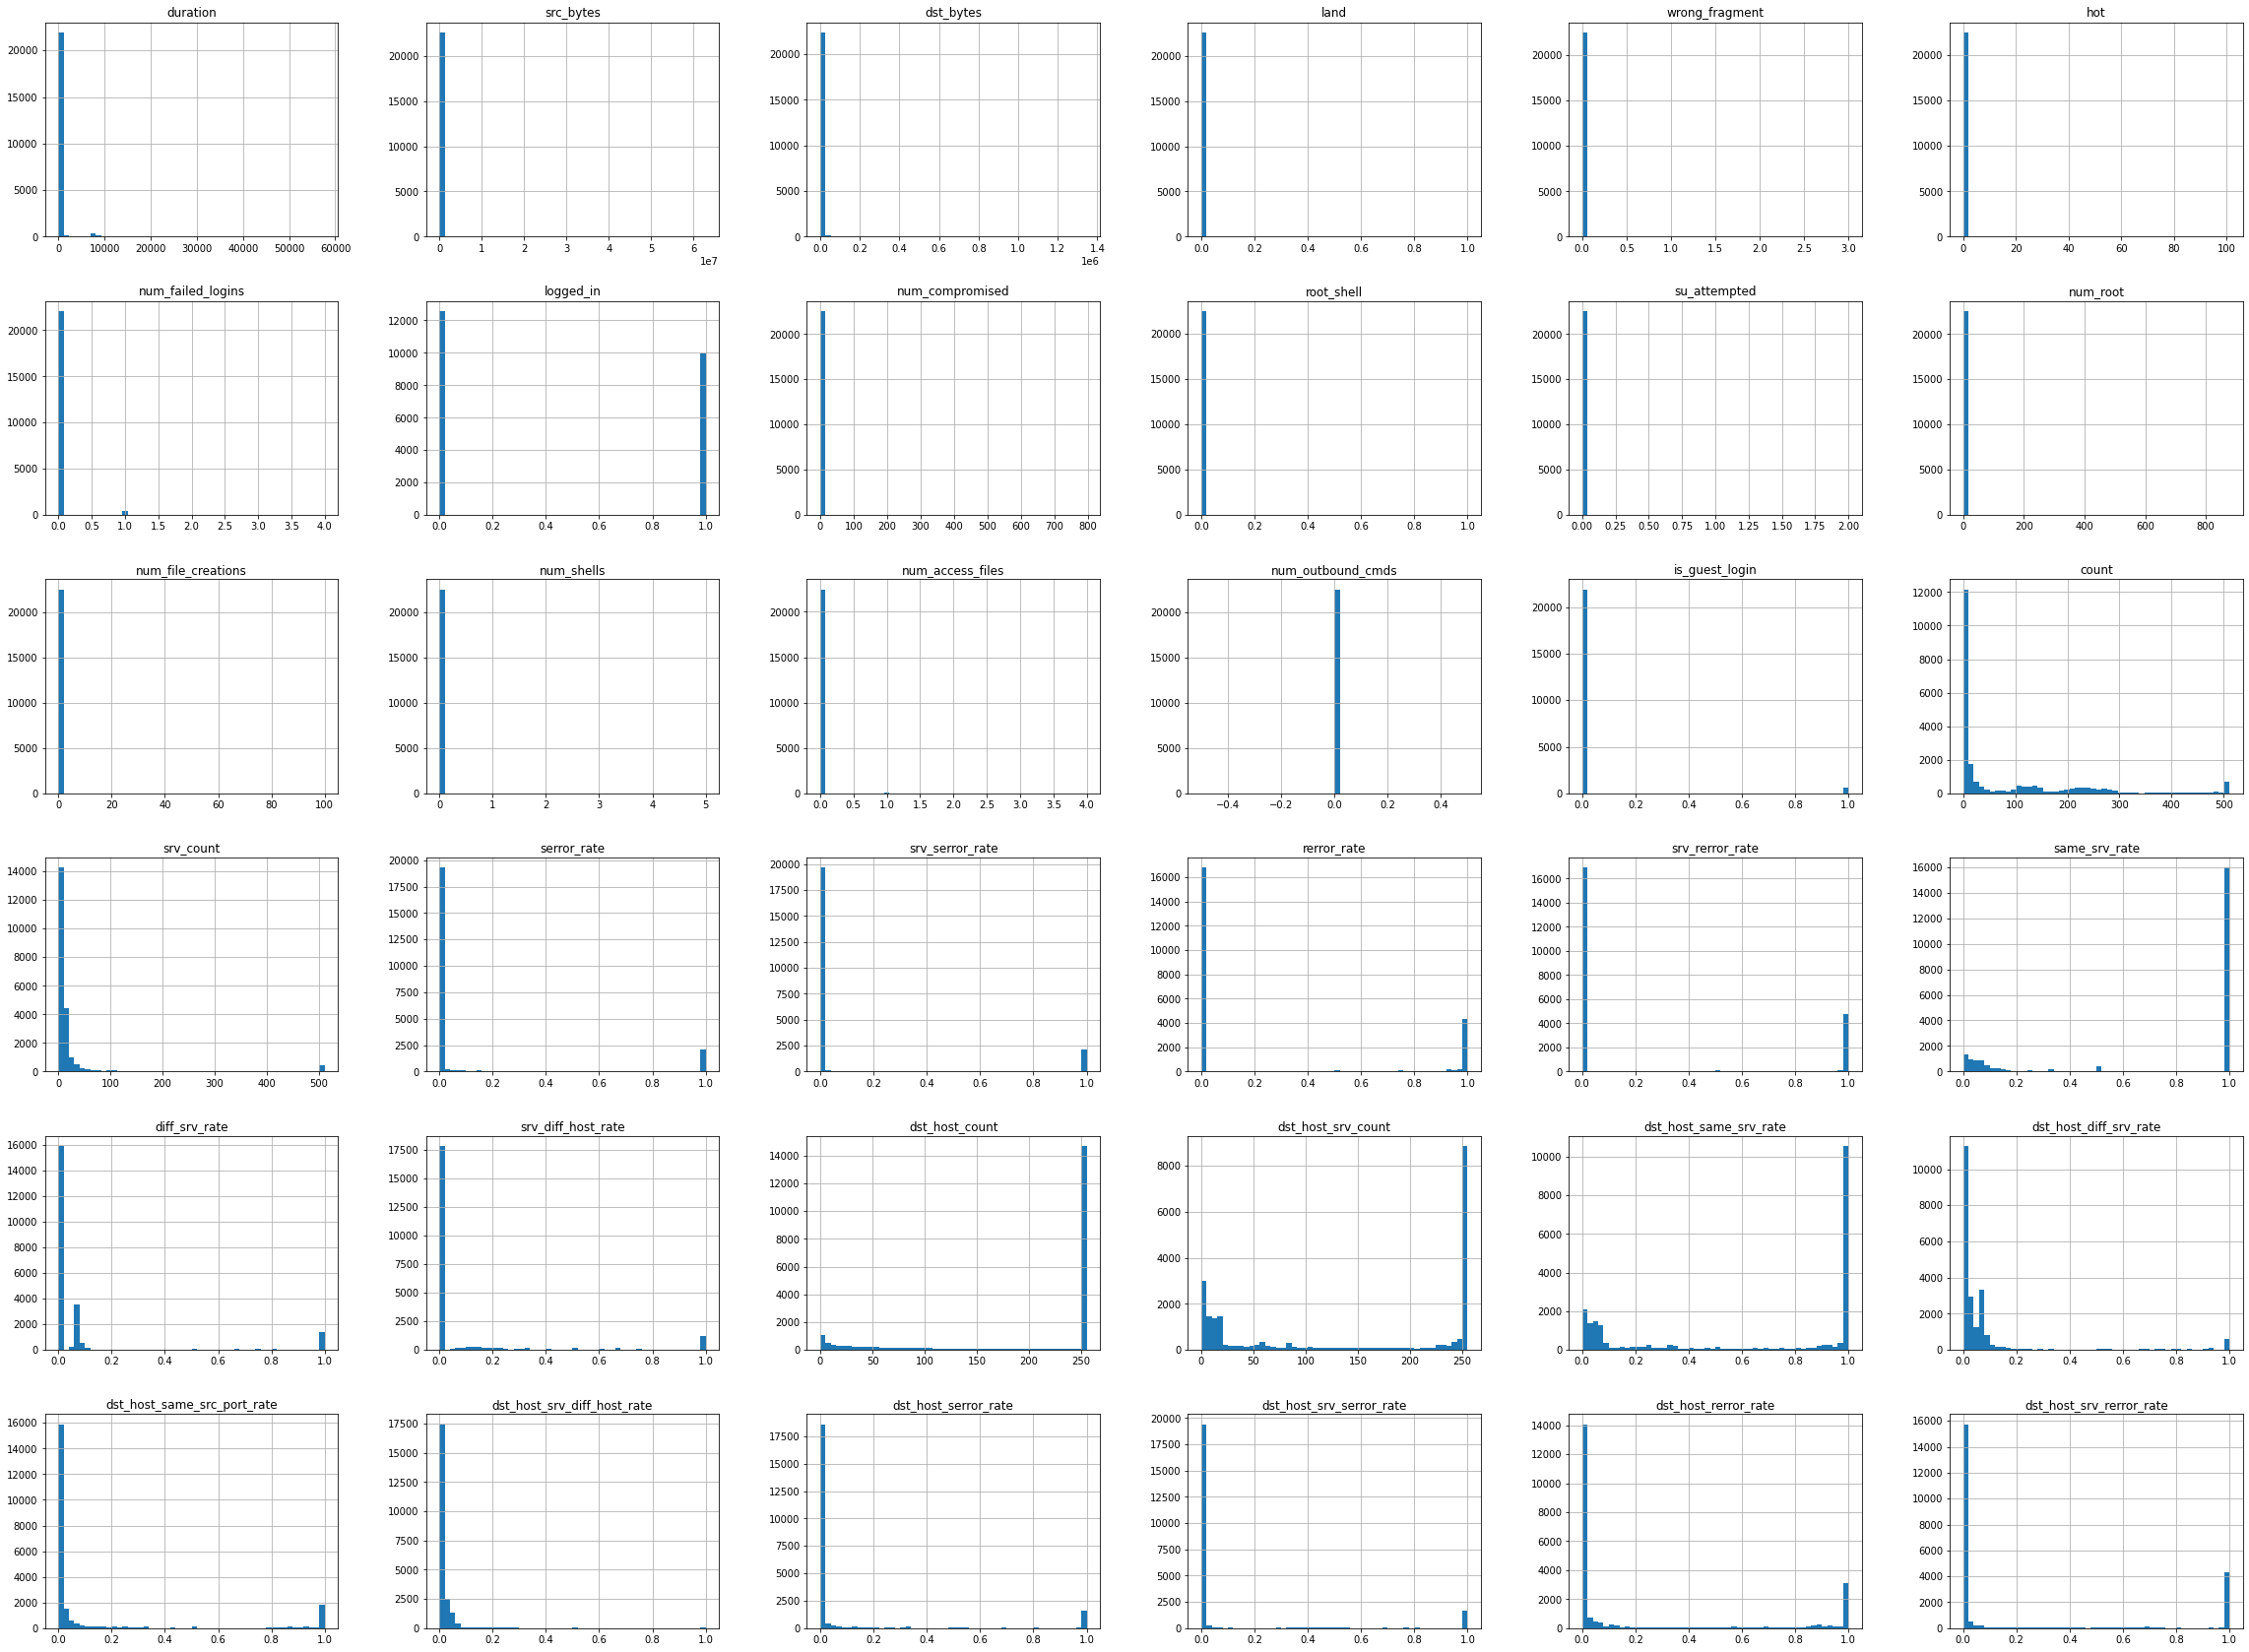

In [263]:
df.hist(bins=50, figsize=(40,30))
plt.show()

Above is a histogram of all the features to see the distribution of values of the features. We will dig deeper into some of the features below.

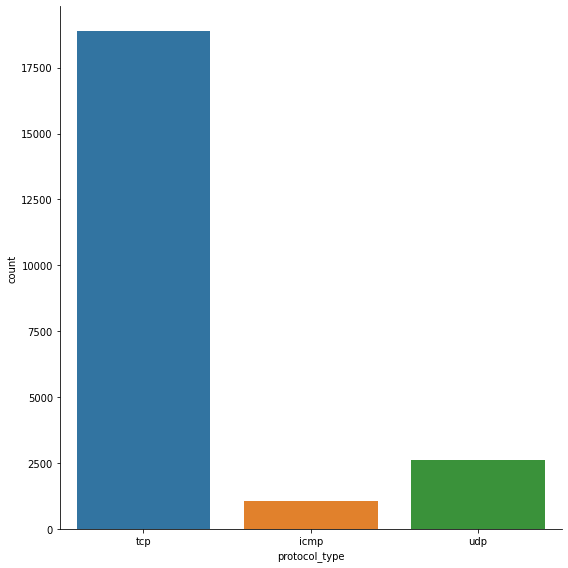

In [264]:
#Checking value counts of feature protocol_type
sns.catplot(x="protocol_type", kind="count",height=8, aspect=1,  data=df);

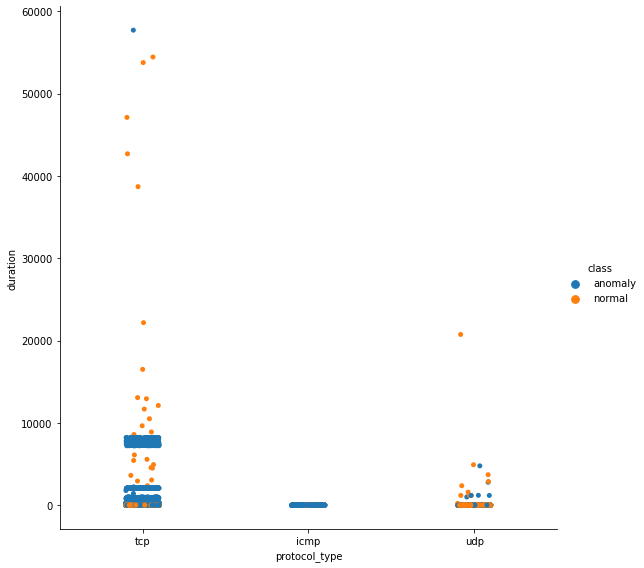

In [265]:
sns.catplot(x="protocol_type", y = "duration" ,hue="class",height=8, aspect=1,  data=df);

Based on the above visualization we see that the when the protocol_type is ICMP most classified as "Anamoly" and when protocol_type is TCP and duration is less than 10000 then most of the classification is "Anamoly"

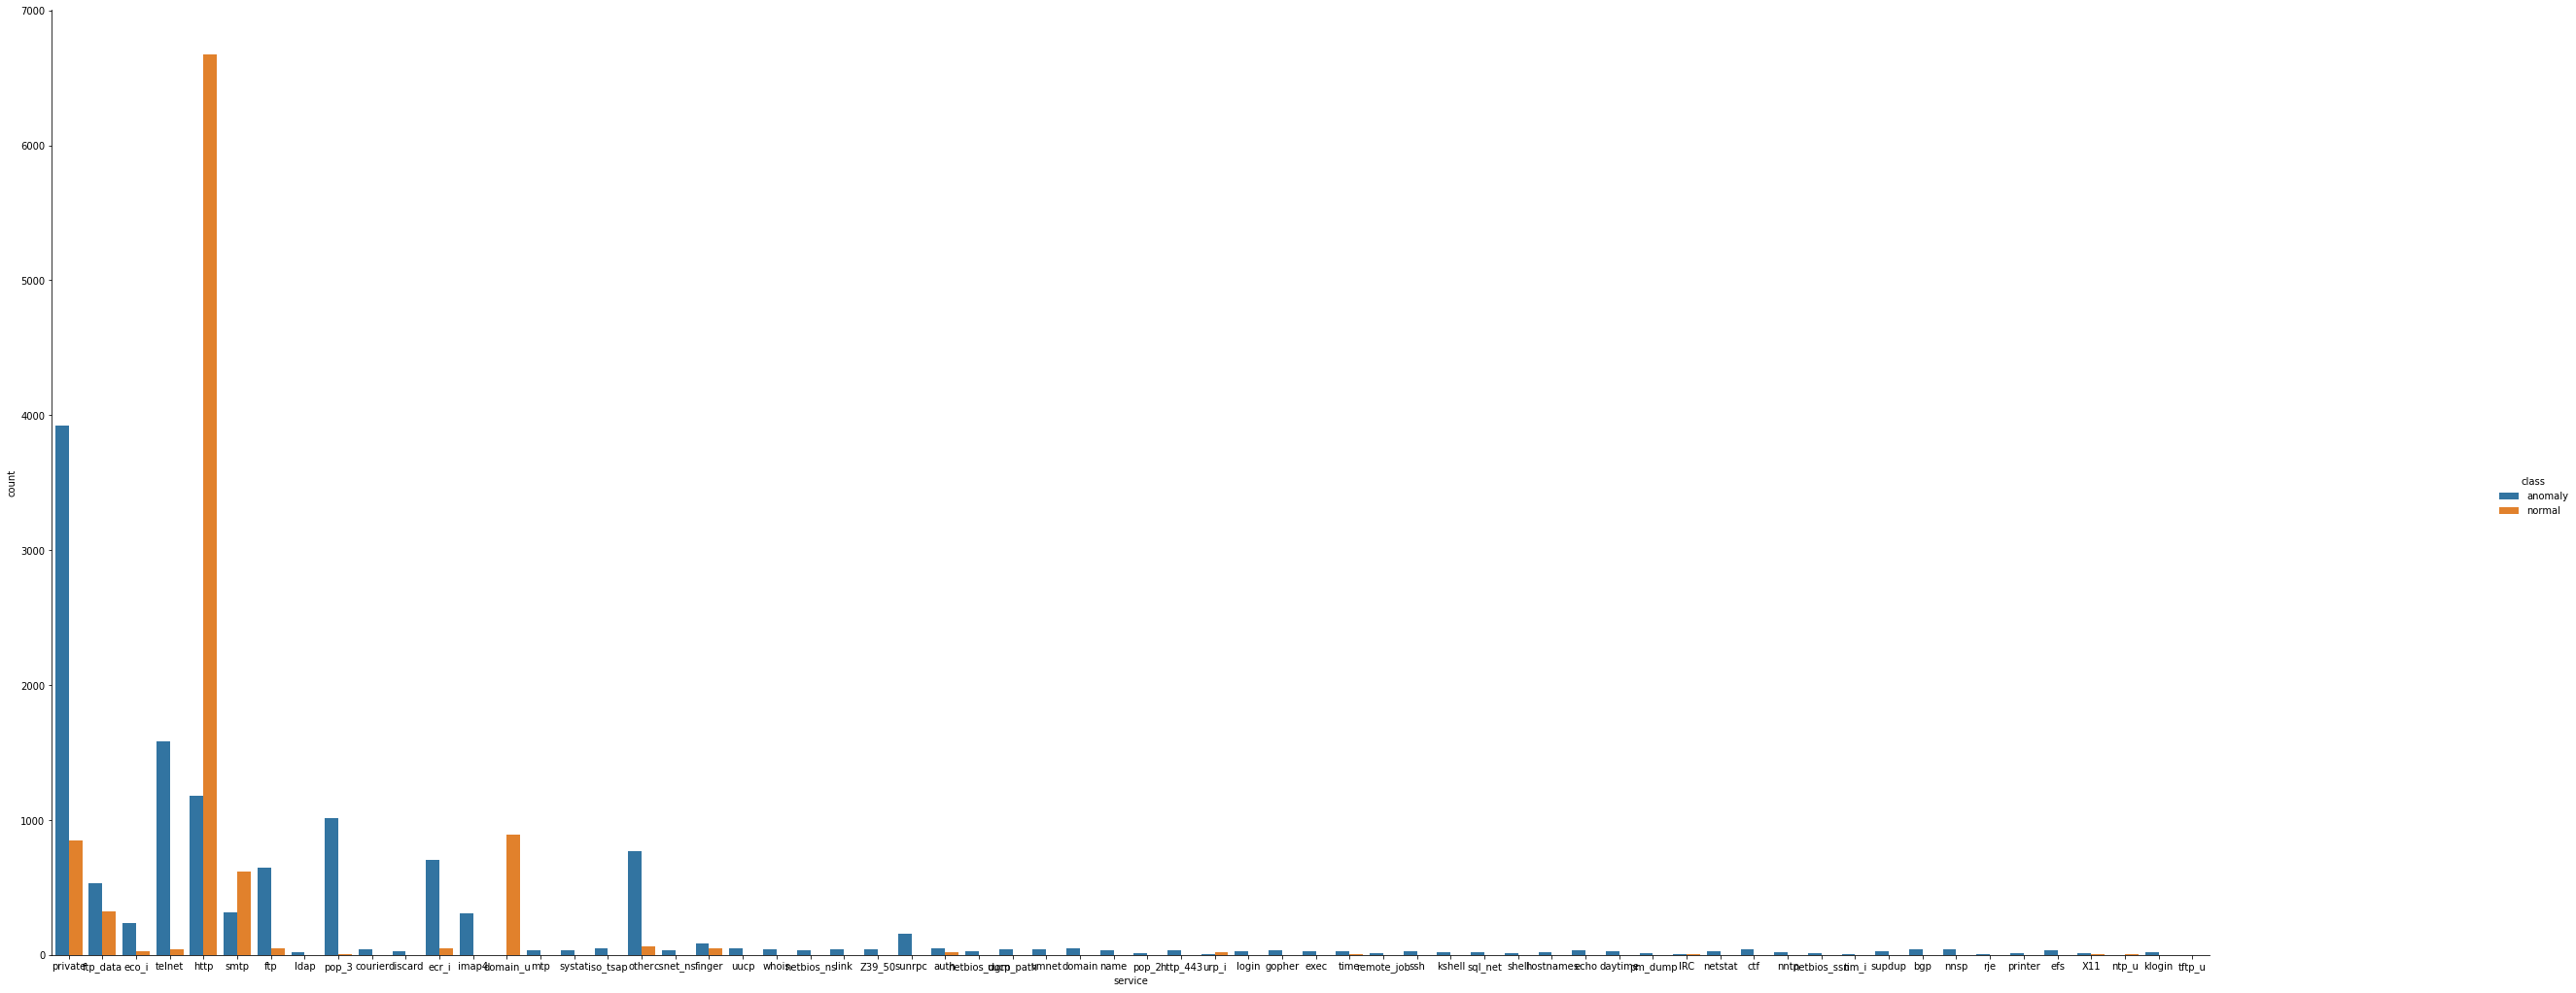

In [266]:
plot = sns.catplot(x="service", kind="count",hue="class",height=8, aspect=1,  data=df);
plot.fig.set_size_inches(40,15)

We do see when service is "http" the classification is mostly "normal" and when the service is "private" or "pop_3" or "telnet" or "iso_tsap" the classification is mostly "anomaly".

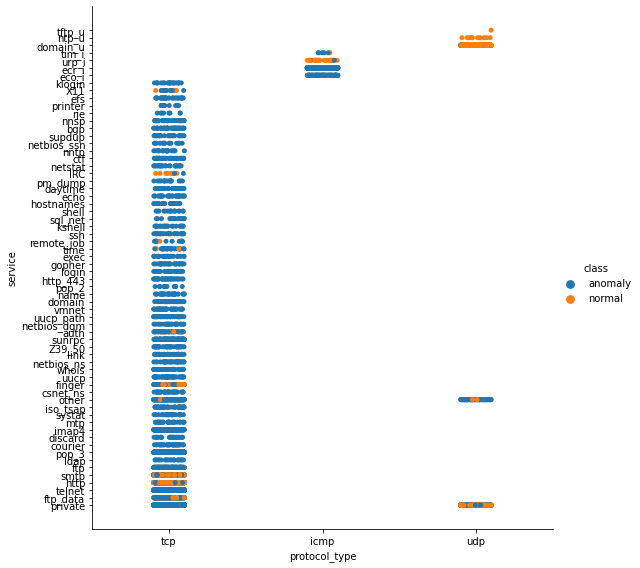

In [267]:
sns.catplot(x="protocol_type", y = "service" ,hue="class",height=8, aspect=1,  data=df);

Above visualization is to see which service for a given protocol_type is classified as "Normal" or "Anomaly".

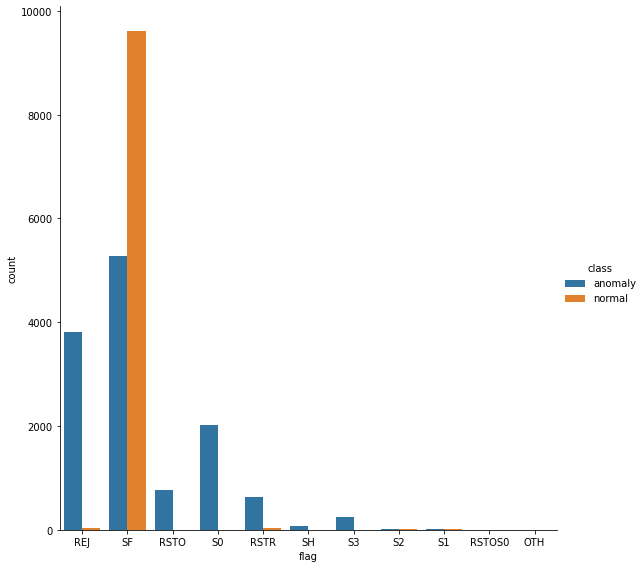

In [268]:
sns.catplot(x="flag", kind="count",height=8, hue="class",aspect=1,  data=df);

Based on above visualization we see that when the flag value is other than SF the data point is classified as "Anomaly"

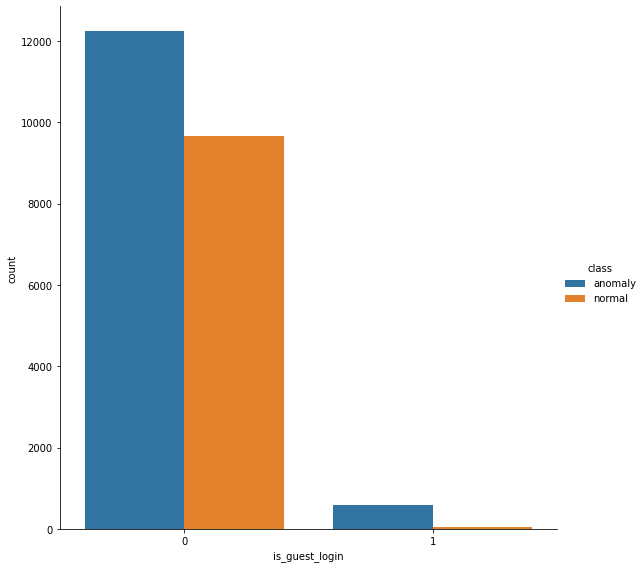

In [269]:
sns.catplot(x="is_guest_login", kind="count",height=8, hue="class", aspect=1,  data=df);

When the "is_guest_login" is 1 the class is "Anomaly"

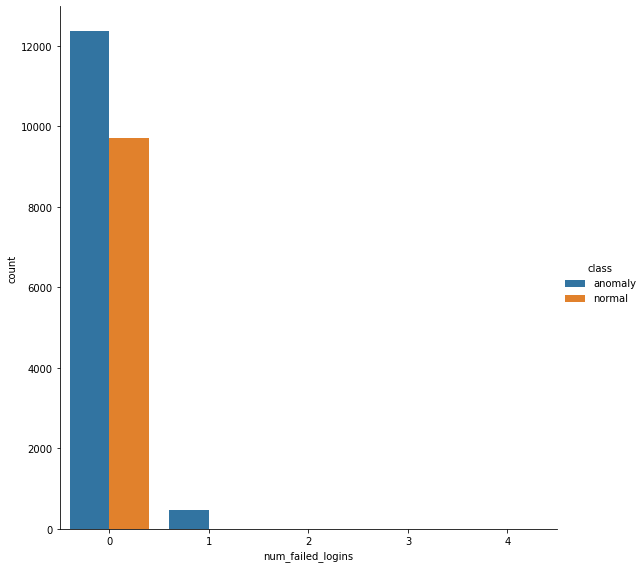

In [270]:
sns.catplot(x="num_failed_logins", kind="count",height=8, hue="class",aspect=1,  data=df);

Based on the above if num_failed_logins is 1 then the class is "Anomaly"

Changing the variable type to categorical type for columns with strings and modify them to cat codes for correlation analysis and also for model building

In [271]:
df['protocol_type'] = df['protocol_type'].astype('category')
df['service'] = df['service'].astype('category')
df['flag'] = df['flag'].astype('category')
df['protocol_type'] = df['protocol_type'].cat.codes
df['service'] = df['service'].cat.codes
df['flag'] = df['flag'].cat.codes
class_types = ['normal', 'anomaly']
df['class'] = pd.Categorical(df['class'], categories=class_types)
df["class"] = df["class"].cat.codes

Converting the string values into categorial codes in the features.
Using cat code of 0 for Normal class and 1 for Anomaly class so that positive classes are marked as 1 and is for interest in this dataset

<h2>1.4. Correlational Analysis</h2>

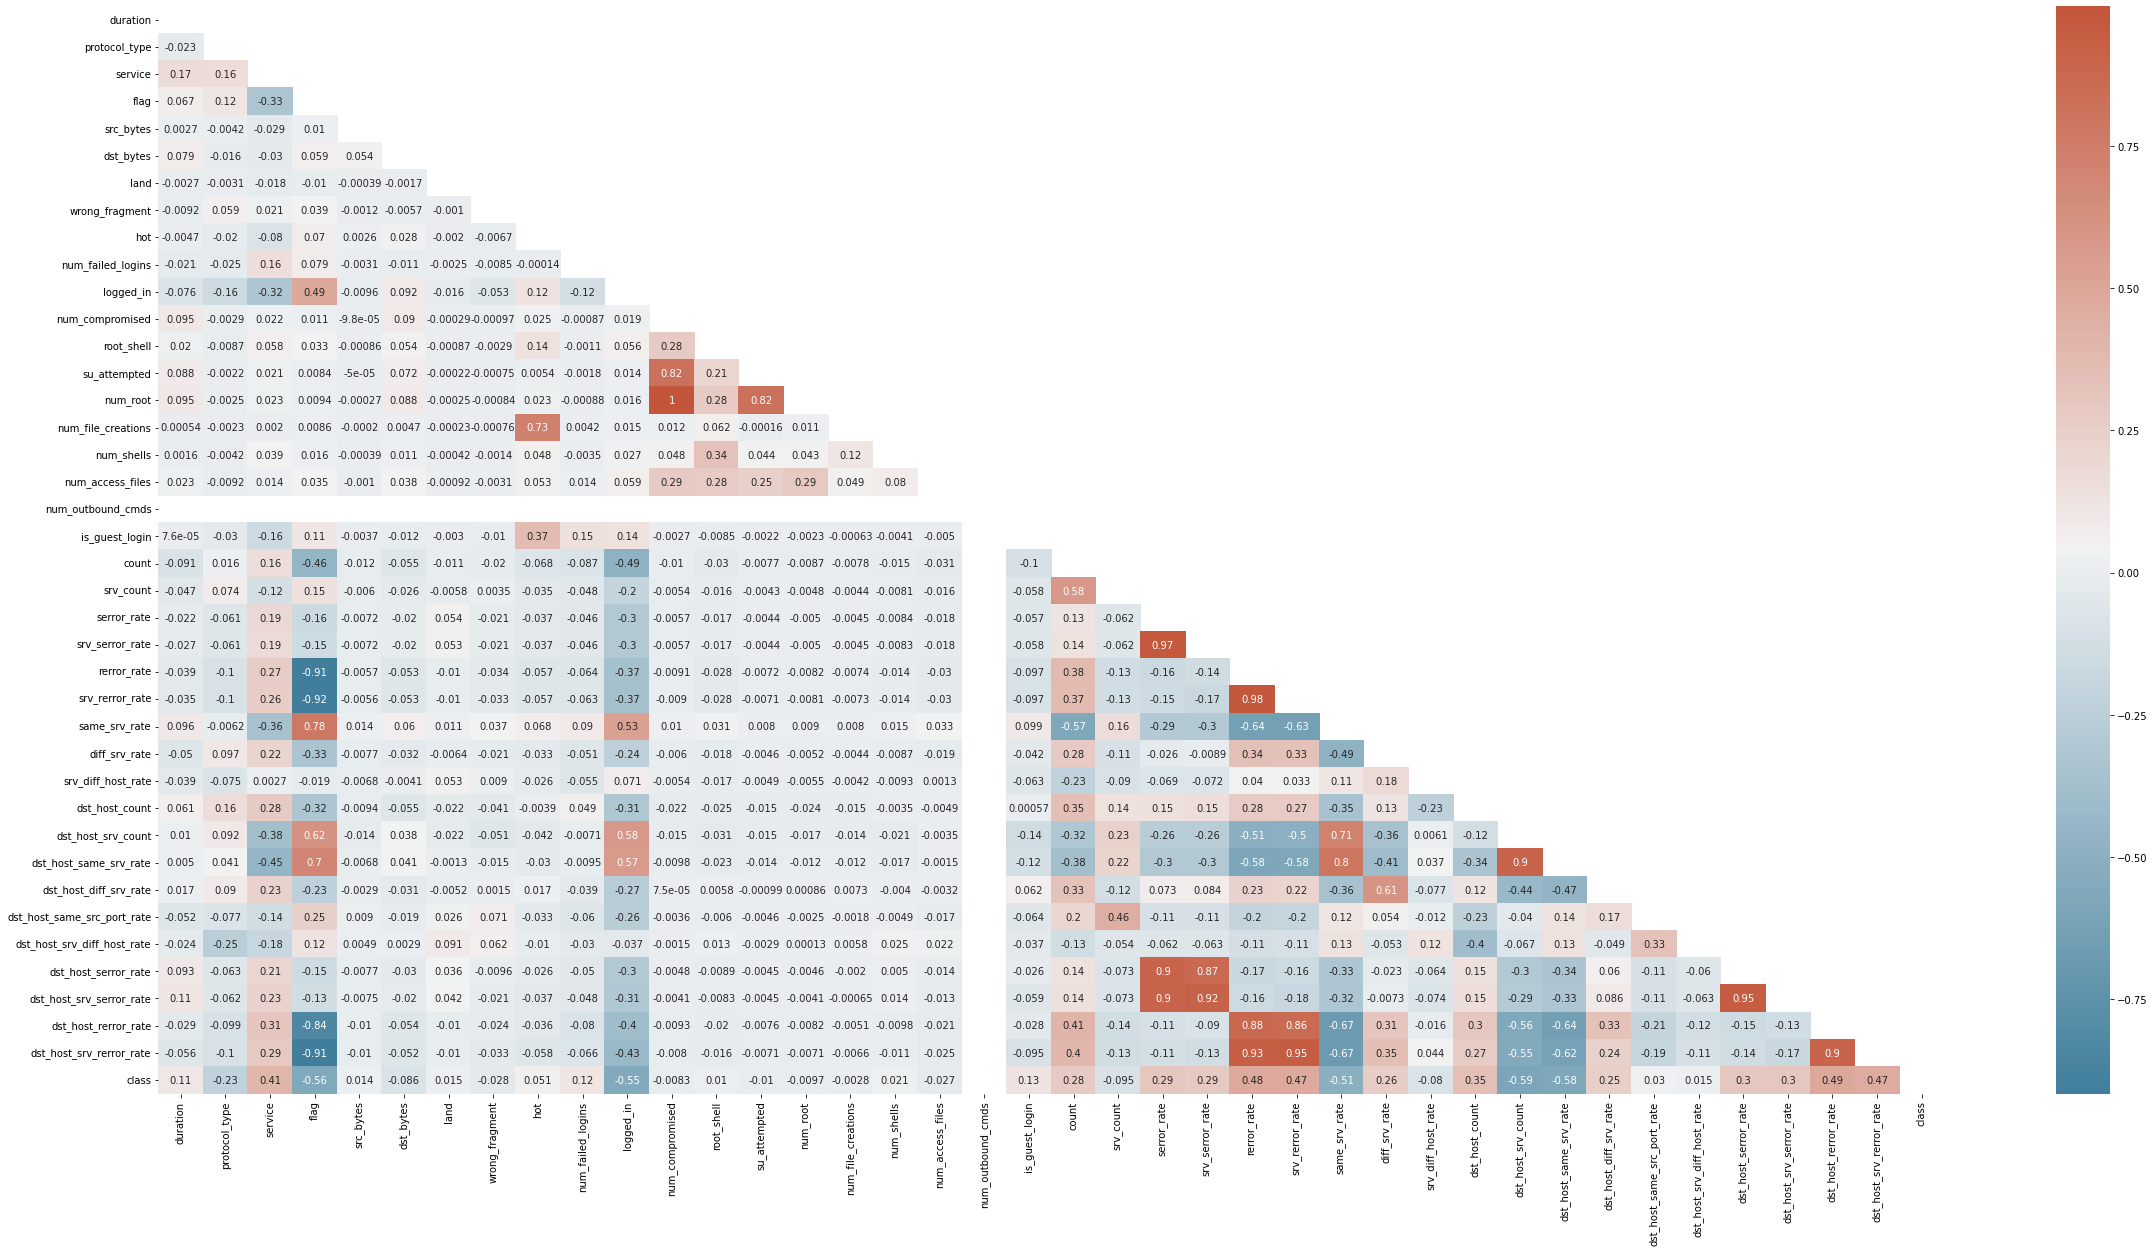

In [272]:
#Correlation Analysis on all the features against each other
cor = df.corr()
f, ax = plt.subplots(figsize=(40, 20))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Generate a mask for upper traingle of the correlation matrix
mask = np.triu(np.ones_like(cor, dtype=bool))
sns.heatmap(cor, annot=True, mask=mask, cmap=cmap)

Observations from the Correlation Data:


1.   num_outbound_cmnds columns seems has no values or all zeroes.
2.   Column "srv_rerror_rate" is highly correlated to "dst_host_srv_rerror_rate" (0.95).
3.   Column "srv_serror_rate" is highly correlated to "serror_rate" (0.97).
4.   Column "num_root" is highly correlated to "num_compromised" (1).
5.   Column "srv_rerror_rate" is highly correlated to "rerror_rate" (0.98).
6.   Column "dst_host_serror_rate" is highly correlated to "dst_host_srv_serror_rate" (0.95).





Of the features that are correlated to each other, we find which one is least correlated to the class and we can drop those columns.

In [273]:
print("Class <-> srv_rerror_rate", cor['class'].loc['srv_rerror_rate'])
print("Class <-> dst_host_srv_rerror_rate", cor['class'].loc['dst_host_srv_rerror_rate'])

Class <-> srv_rerror_rate 0.47454681801466236
Class <-> dst_host_srv_rerror_rate 0.47264514466071406


In [274]:
print("Class <-> srv_serror_rate", cor['class'].loc['srv_serror_rate'])
print("Class <-> serror_rate", cor['class'].loc['serror_rate'])

Class <-> srv_serror_rate 0.2931433504308643
Class <-> serror_rate 0.293762806262939


In [275]:
print("Class <-> num_root", cor['class'].loc['num_root'])
print("Class <-> num_compromised", cor['class'].loc['num_compromised'])

Class <-> num_root -0.009652385825925472
Class <-> num_compromised -0.008301285309056028


In [276]:
print("Class <-> srv_rerror_rate", cor['class'].loc['srv_rerror_rate'])
print("Class <-> rerror_rate", cor['class'].loc['rerror_rate'])

Class <-> srv_rerror_rate 0.47454681801466236
Class <-> rerror_rate 0.4810801977407936


In [277]:
print("Class <-> dst_host_serror_rate", cor['class'].loc['dst_host_serror_rate'])
print("Class <-> dst_host_srv_serror_rate", cor['class'].loc['dst_host_srv_serror_rate'])

Class <-> dst_host_serror_rate 0.29877078494835635
Class <-> dst_host_srv_serror_rate 0.3002548926292879


Based on the above observations we can drop the feature columns "dst_host_serror_rate", "num_compromised", "srv_serror_rate", "dst_host_srv_rerror_rate"

In [278]:
df['num_outbound_cmds'].describe()
#All zeroes in this feature and can be removed from the dataset.

count    22544.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: num_outbound_cmds, dtype: float64

Since the num_outbound_cmds column has no values, we can take this column out of the data set. Cleaning of the dataset based on above observations is done in the below sections

<h1>2. Data Preprocessing and Cleaning </h1>








<h2> 2.1. Pre-processing of data to fix missing values </h2>

Identifying and replacing/dropping null or missing values in the data set

In [279]:
df.isnull().sum()

duration                        0
protocol_type                   0
service                         0
flag                            0
src_bytes                       0
dst_bytes                       0
land                            0
wrong_fragment                  0
hot                             0
num_failed_logins               0
logged_in                       0
num_compromised                 0
root_shell                      0
su_attempted                    0
num_root                        0
num_file_creations              0
num_shells                      0
num_access_files                0
num_outbound_cmds               0
is_guest_login                  0
count                           0
srv_count                       0
serror_rate                     0
srv_serror_rate                 0
rerror_rate                     0
srv_rerror_rate                 0
same_srv_rate                   0
diff_srv_rate                   0
srv_diff_host_rate              0
dst_host_count

Only the features dst_host_count and dst_host_srv_count have empty values. <br>
Checking the mean,std and max values of the columns which have null/empty values

In [280]:
df['dst_host_count'].describe()

count    22531.000000
mean       193.863965
std         94.042593
min          0.000000
25%        121.000000
50%        255.000000
75%        255.000000
max        255.000000
Name: dst_host_count, dtype: float64

In [281]:
df['dst_host_srv_count'].describe()

count    22532.000000
mean       140.752663
std        111.786948
min          0.000000
25%         15.000000
50%        168.000000
75%        255.000000
max        255.000000
Name: dst_host_srv_count, dtype: float64

Checking the frequency of values in the columns which have missing values

In [282]:
print(df['dst_host_srv_count'].value_counts())

255.0    7525
1.0      1594
254.0     607
253.0     397
2.0       395
         ... 
202.0      10
112.0      10
207.0      10
205.0       7
0.0         1
Name: dst_host_srv_count, Length: 256, dtype: int64


In [283]:
print(df['dst_host_count'].value_counts())

255.0    14629
1.0        365
2.0        236
3.0        200
4.0        182
         ...  
203.0       10
195.0        7
227.0        7
246.0        7
0.0          1
Name: dst_host_count, Length: 256, dtype: int64


Since the most frequent value/mode has high value we could replace the missing value with the high frequency value/mode.

In [284]:
mode_dst = df['dst_host_count'].mode()[0]
mode_dst_host = df['dst_host_srv_count'].mode()[0]
df_pre = df.copy(deep=True)
df_pre['dst_host_count'].fillna(mode_dst, inplace = True)
df_pre['dst_host_srv_count'].fillna(mode_dst_host, inplace = True)

In [285]:
df_pre['dst_host_count'].describe()

count    22544.000000
mean       193.899219
std         94.026928
min          0.000000
25%        121.000000
50%        255.000000
75%        255.000000
max        255.000000
Name: dst_host_count, dtype: float64

In [286]:
df_pre['dst_host_srv_count'].describe()

count    22544.000000
mean       140.813476
std        111.788256
min          0.000000
25%         15.000000
50%        168.000000
75%        255.000000
max        255.000000
Name: dst_host_srv_count, dtype: float64

We observe that the mean and std didnt change by much after replacing the missing values by the mode, so this looks like a good strategy to fill the missing cells

In the data exploration section, we identified redundant columns. <br>Removing columns that have high correlation from the dataset. Based on the observation from Correlation analysis, removing the columns dst_host_serror_rate", "num_compromised", "srv_serror_rate", "dst_host_srv_rerror_rate" and "num_outbound_cmds"

In [287]:
df_pre.drop(['dst_host_serror_rate'], axis = 1, inplace = True)
df_pre.drop(['num_compromised'], axis = 1, inplace = True)
df_pre.drop(['srv_serror_rate'], axis = 1, inplace = True)
df_pre.drop(['dst_host_srv_rerror_rate'], axis = 1, inplace = True)
df_pre.drop(['num_outbound_cmds'], axis = 1, inplace = True)

In [288]:
df_pre.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,hot,num_failed_logins,logged_in,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_guest_login,count,srv_count,serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,class
0,0,1,45,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,1.0,1.0,0.04,0.06,0.00,255.0,10.0,0.04,0.06,0.00,0.00,0.0,1.00,1
1,0,1,45,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,1.0,1.0,0.01,0.06,0.00,255.0,1.0,0.00,0.06,0.00,0.00,0.0,1.00,1
2,2,1,19,9,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,1.00,0.00,0.00,134.0,86.0,0.61,0.04,0.61,0.02,0.0,0.00,0
3,0,0,13,9,20,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.0,0.0,1.00,0.00,1.00,3.0,57.0,1.00,0.00,1.00,0.28,0.0,0.00,1
4,1,1,55,2,0,15,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,1.0,0.5,1.00,0.00,0.75,29.0,86.0,0.31,0.17,0.03,0.02,0.0,0.83,1


In [289]:
#Making a copy of the dataframe so that we have two copies one with outliers and other outliers removes
df_pre_out = df_pre.copy(deep = True)
#Removing rows with outlier data using the zscore mechanism 
# Looking at the data description, the columns "duration", "src_bytes", "dst_bytes" have high std. 
# Remove the rows that are outside zscore of -3 and 3

zscore = ( df_pre_out.duration - df_pre_out.duration.mean() ) / df_pre_out.duration.std()
df_pre_out = df_pre_out.merge(zscore.rename('zscore'),left_index=True, right_index = True)
df_pre_out = df_pre_out[(df_pre_out.zscore>-3) & (df_pre_out.zscore<3)]
print("Shape of the dataset after removing the outlier rows",df_pre_out.shape)


Shape of the dataset after removing the outlier rows (22050, 36)


In [290]:
df_pre_out.drop("zscore",axis = 1, inplace = True)
#Feature - src_bytes
zscore = ( df_pre_out.src_bytes - df_pre_out.src_bytes.mean() ) / df_pre_out.src_bytes.std()
df_pre_out = df_pre_out.merge(zscore.rename('zscore'),left_index=True, right_index = True)
df_pre_out= df_pre_out[(df_pre_out.zscore>-3) & (df_pre_out.zscore<3)]
print("Shape of the dataset after removing the outlier rows",df_pre_out.shape)


Shape of the dataset after removing the outlier rows (22044, 36)


In [291]:
df_pre_out.drop("zscore",axis = 1, inplace = True)
#Feature - dst_bytes
zscore = ( df_pre_out.dst_bytes - df_pre_out.dst_bytes.mean() ) / df_pre_out.dst_bytes.std()
df_pre_out = df_pre_out.merge(zscore.rename('zscore'),left_index=True, right_index = True)
df_pre_out = df_pre_out[(df_pre_out.zscore>-3) & (df_pre_out.zscore<3)]
print("Shape of the dataset after removing the outlier rows",df_pre_out.shape)


Shape of the dataset after removing the outlier rows (22002, 36)


In [292]:
#Removing the zscore column before we run the model on the dataset
df_pre_out.drop("zscore",axis = 1, inplace = True)
print(df_pre_out.columns)

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'hot', 'num_failed_logins',
       'logged_in', 'root_shell', 'su_attempted', 'num_root',
       'num_file_creations', 'num_shells', 'num_access_files',
       'is_guest_login', 'count', 'srv_count', 'serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'class'],
      dtype='object')


**df_pre** is the pre-processed, feature engineered and clean dataset on which the model could be built. The dataset is still not normalized, so lets do that.

<h2>2.2. Feature engineering</h2>

In [293]:
#Splitting the dataset into X and y. X->Features and y->class
X = df_pre.iloc[:, 0:34]
X.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,hot,num_failed_logins,logged_in,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_guest_login,count,srv_count,serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_srv_serror_rate,dst_host_rerror_rate
0,0,1,45,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,1.0,1.0,0.04,0.06,0.00,255.0,10.0,0.04,0.06,0.00,0.00,0.0,1.00
1,0,1,45,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,1.0,1.0,0.01,0.06,0.00,255.0,1.0,0.00,0.06,0.00,0.00,0.0,1.00
2,2,1,19,9,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,1.00,0.00,0.00,134.0,86.0,0.61,0.04,0.61,0.02,0.0,0.00
3,0,0,13,9,20,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.0,0.0,1.00,0.00,1.00,3.0,57.0,1.00,0.00,1.00,0.28,0.0,0.00
4,1,1,55,2,0,15,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,1.0,0.5,1.00,0.00,0.75,29.0,86.0,0.31,0.17,0.03,0.02,0.0,0.83


In [294]:
y = df_pre.iloc[:, 34:35]
y.dtypes

class    int8
dtype: object

In [295]:
y.head()

,class
0,1
1,1
2,0
3,1
4,1


Normalizing the Data set

In [296]:
X_normalized = normalize(X, norm='l2', axis=1, copy=True, return_norm=False)

In [297]:
df_pre['class'].value_counts()

1    12833
0     9711
Name: class, dtype: int64

<h2>2.3. Data balancing tasks<h2>

We do see a slight imbalance in the class distribution in the data set, so we can try to make them same using Over sampling or Under sampling data balancing techniques. Below we are setting up X and y for the model based on oversampled and undersampled data.

In [298]:
#Using OverSampling
ros = RandomOverSampler(random_state=0)
ros.fit(X_normalized, y)
X_resampled, y_resampled = ros.fit_resample(X, y)

In [299]:
#Using UnderSampling
rus = RandomUnderSampler(random_state=0)
rus.fit(X_normalized, y)
X_undersampled, y_undersampled = rus.fit_resample(X, y)

Note: We have X,y here from the original data set that is not normalized. 

*   X_normalized is the data post normalizing
*   X_resampled -> Oversampled dataset features
*   X_undersampled -> Undersampled dataset features






We have the required data now to go to the next phase of Model Building. We will use the above different X and y splits in the below sections to build the model and evaluate performance metrics.

<h1>3. Model Building </h1>



Let's define a function that would take X/Y_train and X/y-test and fit GaussianNB, BernoulliNB and MultinomialNB on the passed data and print the corresponding accuracy.

In [300]:
def run_NB_classifiers(X_train, y_train, X_test, y_test):
  gnb = GaussianNB()
  gnb.fit(X_train, y_train.to_numpy().reshape(-1))
  print("Naive Bayes score: ",gnb.score(X_test, y_test))
  bnb = BernoulliNB()
  bnb.fit(X_train, y_train.to_numpy().reshape(-1))
  print("Bernoulli Bayes score: ",bnb.score(X_test, y_test))
  mnb = MultinomialNB()
  mnb.fit(X_train, y_train.to_numpy().reshape(-1))
  print("Multinomial Bayes score: ",mnb.score(X_test, y_test))
  return (gnb, bnb, mnb)

<h2>3.1. Split the dataset</h2>

Splitting the dataset into two test cases as shown below:

Case 1 :   Train = 80 % Test = 20%  [ x_train1,y_train1] = 80% ; 

In [301]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, train_size = 0.8, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print("Accuracy for different NB Classifiers with Case1 split of the data")
(gnb_80_20, bnb_80_20, mnb_80_20) = run_NB_classifiers(X_train, y_train, X_test, y_test)

(18035, 34) (4509, 34) (18035, 1) (4509, 1)
Accuracy for different NB Classifiers with Case1 split of the data
Naive Bayes score:  0.821468174761588
Bernoulli Bayes score:  0.872255489021956
Multinomial Bayes score:  0.8307828786870703



Case 2 :   Train = 10 % Test = 90%  [ x_train2,y_train2] = 10% ; 




In [302]:
X_train_9010, X_test_9010, y_train_9010, y_test_9010 = train_test_split(X_normalized, y, train_size = 0.1, test_size=0.9)
print(X_train_9010.shape, X_test_9010.shape, y_train_9010.shape, y_test_9010.shape)
print("Accuracy for different NB Classifiers with Case2 split of the data")
(gnb_10_90, bnb_10_90, mnb_10_90) = run_NB_classifiers(X_train_9010, y_train_9010, X_test_9010, y_test_9010)

(2254, 34) (20290, 34) (2254, 1) (20290, 1)
Accuracy for different NB Classifiers with Case2 split of the data
Naive Bayes score:  0.8251848201084278
Bernoulli Bayes score:  0.8734351897486446
Multinomial Bayes score:  0.8387382947264662


The accuracy scores are pretty equivalent even when the data for train is 10% compared to 80%. This shows that the model does not need too much data to train and also that the hypothetis function is not improving much more even if we add more train data

We have already did data balancing in previous section and X_resampled and X_Undersampled are the datasets with Over/Undersampling done to balance the class distribution. 



In [303]:
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_resampled, y_resampled, train_size = 0.8, test_size=0.2)
print(X_train_over.shape, X_test_over.shape, y_train_over.shape, y_test_over.shape)
print("Accuracy for different NB Classifiers after data balancing using Imbalance learning Oversampling")
(gnb_oversample, bnb_oversample, mnb_oversample) = run_NB_classifiers(X_train_over, y_train_over, X_test_over, y_test_over)

(20532, 34) (5134, 34) (20532, 1) (5134, 1)
Accuracy for different NB Classifiers after data balancing using Imbalance learning Oversampling
Naive Bayes score:  0.7937280872613947
Bernoulli Bayes score:  0.8839111803661862
Multinomial Bayes score:  0.5781067393844955


In [304]:
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_undersampled, y_undersampled, train_size = 0.8, test_size=0.2)
print(X_train_under.shape, X_test_under.shape, y_train_under.shape, y_test.shape)
print("Accuracy for different NB Classifiers after data balancing using Imbalance learning Undersampling")
(gnb_undersample, bnb_undersample, mnb_undersample) = run_NB_classifiers(X_train_under, y_train_under, X_test_under, y_test_under)

(15537, 34) (3885, 34) (15537, 1) (4509, 1)
Accuracy for different NB Classifiers after data balancing using Imbalance learning Undersampling
Naive Bayes score:  0.7734877734877735
Bernoulli Bayes score:  0.8828828828828829
Multinomial Bayes score:  0.5554697554697555


In [305]:
#Trying to run model on the dataset that has outliers removed from it from certain features
X_out = df_pre_out.iloc[:, 0:34]
y_out = df_pre_out.iloc[:, 34:35]
X_normalized_out = normalize(X_out, norm='l2', axis=1, copy=True, return_norm=False)
X_train_out, X_test_out, y_train_out, y_test_out = train_test_split(X_normalized_out, y_out, train_size = 0.8, test_size=0.2)
print(X_train_out.shape, X_test_out.shape, y_train_out.shape, y_test_out.shape)
print("Accuracy for model built on dataset that has outliers removed from certain features")
(gnb_80_20, bnb_80_20, mnb_80_20) = run_NB_classifiers(X_train_out, y_train_out, X_test_out, y_test_out)


(17601, 34) (4401, 34) (17601, 1) (4401, 1)
Accuracy for model built on dataset that has outliers removed from certain features
Naive Bayes score:  0.8204953419677347
Bernoulli Bayes score:  0.8677573278800272
Multinomial Bayes score:  0.8073165189729606


We can note that removing the outliers is not significantly increasing the accuracy of the models we are fitting. So we can conclude that the outliers in the features have no affect on this model. We will continue to use the dataset with the outliers for further performance testing.

K-Fold cross validation of the Model

In [306]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
#K-Fold Validation of the Bernoulli Classifier
clf = BernoulliNB()
cv_results = cross_val_score(clf, X_normalized, y.to_numpy().reshape(-1), cv=k_fold)
#print(cv_results)
print('Bernoulli KFold accuracy is: ', cv_results.mean())

Bernoulli KFold accuracy is:  0.8739791885133499


In [307]:
#K-Fold cross validation scores for GaussianNB classifier
k_fold_gaussian = KFold(n_splits=10, shuffle=True, random_state=0)
clf_g = GaussianNB()
cv_g_results = cross_val_score(clf_g, X_normalized, y.to_numpy().reshape(-1), cv=k_fold_gaussian)
#print(cv_g_results)
print('Gaussian KFold accuracy is: ', cv_g_results.mean())

Gaussian KFold accuracy is:  0.8236764992317183


In [308]:
#K-Fold cross validation scores for MultinomialNB classifier
kfold_multi = KFold(n_splits=10, shuffle=True, random_state=0)
clf_m = MultinomialNB()
cv_m_results = cross_val_score(clf_m, X_normalized, y.to_numpy().reshape(-1), cv=kfold_multi)
#print(cv_m_results)
print('Multinomial KFold accuracy is: ', cv_m_results.mean())

Multinomial KFold accuracy is:  0.8363642659416028


Observation: We could see that using K-fold cross validation model built on any split based on k-fold results in similar accuracy results and the deviation from previous accuracy scores is less than 1% which means it is neither overfitted or underfitted

<h1> Regularization </h1>

Note: Since the models we are using here is based on Naive Based classifier we cannot do any regularization as that is used on the linear regression type models to adjust for over sampling by adding penalty. This is not applicable for the problem statement here so not applying regularization techniques.

<h1> Performance Evaluation </h1>





The goal of the assignment and the purpose of the model is to identify Anomalies which is the positive class 1 based on the cat codes defined earlier. Since we are more concerned on identifying anomalies over normal, our preference would be to err on the side of caution and have more false positives over false negatives. Hence, **recall** is a good metrics to score the model on whether it can identify the most anomalies from all possible anomalies. 

In [309]:
# Defining a function that will plot the configuration matrix. 
def plot_confusion_matrix(conf_mat):
  with plt.style.context(('ggplot', 'seaborn')):
      fig = plt.figure(figsize=(6,6), num=1)
      plt.imshow(conf_mat, interpolation='nearest',cmap= plt.cm.Blues )
      plt.xticks([0,1],[0,1])
      plt.yticks([0,1],[0,1])
      plt.xlabel('Predicted Label')
      plt.ylabel('Actual Label')
      for i, j in itertools.product(range(conf_mat.shape[0]), range(conf_mat.shape[1])):
                  plt.text(j, i,conf_mat[i, j], horizontalalignment="center",color="red")
      plt.grid(None)
      plt.title('Confusion Matrix')
      plt.colorbar();

In [310]:
#Defining a function that will evluate the model against a given X/y_Train and X/y_test
#The function will print the Precision, Recall and F1 score of the model passed
def get_performance_metrics(name, model, X_train, X_test, y_train, y_test):
  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)
  conf_mat = confusion_matrix(y_test, y_pred_test)
  print("The statistics below are for %s model:" % name)
  print("%s model accuracy for test data is %f"% (name, accuracy_score(y_test, y_pred_test)))
  print("%s model accuracy for train data is %f"% (name, accuracy_score(y_train, y_pred_train)))
  print(f"Precision Score = {precision_score(y_test, y_pred_test)}")
  print(f"Recall Score = {recall_score(y_test, y_pred_test)}")
  print(f"F1 Score = {f1_score(y_test, y_pred_test)}")
  print()
  plot_confusion_matrix(conf_mat)
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
  plt.figure(figsize=(6,6))
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1], [0,1], 'k--' )
  plt.rcParams['font.size'] = 12
  plt.title('ROC curve for %s:' %name)
  plt.xlabel('False Positive Rate (1 - Specificity)')
  plt.ylabel('True Positive Rate (Sensitivity)')
  plt.show()

The statistics below are for Gaussian Naive Bayes 80:20 model:
Gaussian Naive Bayes 80:20 model accuracy for test data is 0.821468
Gaussian Naive Bayes 80:20 model accuracy for train data is 0.825672
Precision Score = 0.9626024590163934
Recall Score = 0.7196476445806205
F1 Score = 0.8235809774271312



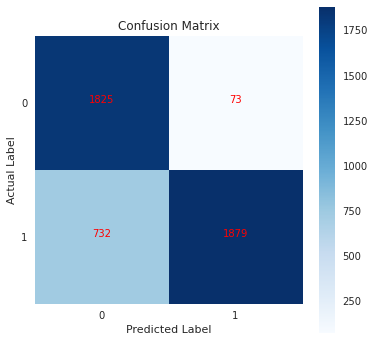

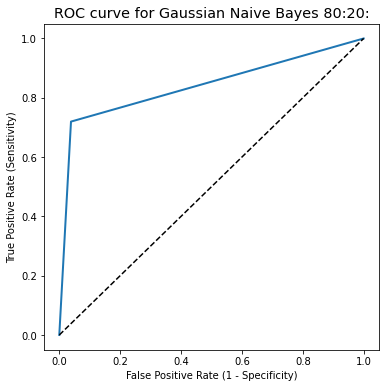

In [311]:
get_performance_metrics("Gaussian Naive Bayes 80:20", gnb_80_20, X_train, X_test, y_train, y_test)

The statistics below are for Gaussian Naive Bayes 10:90 model:
Gaussian Naive Bayes 10:90 model accuracy for test data is 0.825185
Gaussian Naive Bayes 10:90 model accuracy for train data is 0.828749
Precision Score = 0.9478582641847948
Recall Score = 0.7328131772865193
F1 Score = 0.8265780081161689



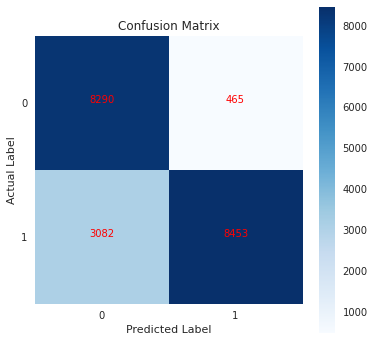

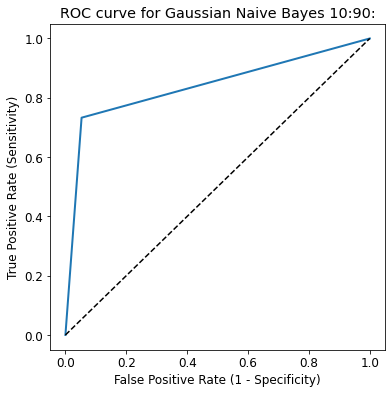

In [312]:
get_performance_metrics("Gaussian Naive Bayes 10:90", gnb_10_90, X_train_9010, X_test_9010, y_train_9010, y_test_9010)

The accuracy of train and test data is very similar so it is not over or under-fitted. 

The statistics below are for Bernoulli 80:20 model:
Bernoulli 80:20 model accuracy for test data is 0.873364
Bernoulli 80:20 model accuracy for train data is 0.874466
Precision Score = 0.934412265758092
Recall Score = 0.8402910762160092
F1 Score = 0.8848558177051825



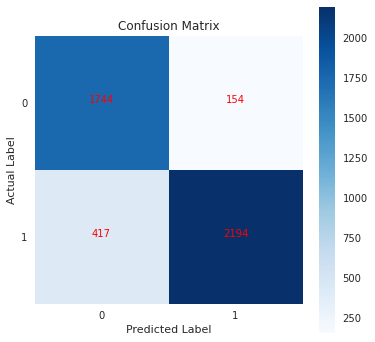

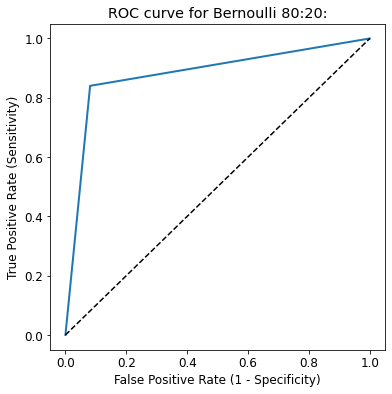

In [313]:
get_performance_metrics("Bernoulli 80:20", bnb_80_20, X_train, X_test, y_train, y_test)

The statistics below are for Bernoulli 10:90 model:
Bernoulli 10:90 model accuracy for test data is 0.873435
Bernoulli 10:90 model accuracy for train data is 0.876220
Precision Score = 0.9350800582241631
Recall Score = 0.835370611183355
F1 Score = 0.8824175824175824



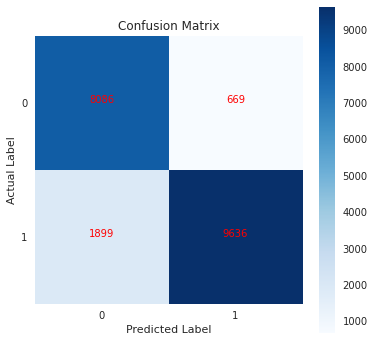

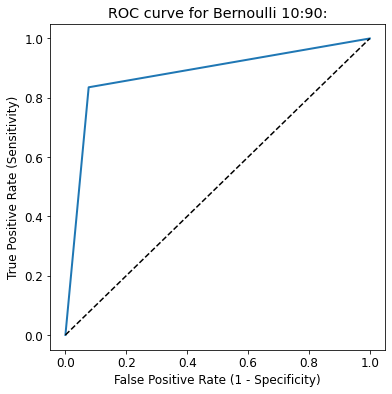

In [314]:
get_performance_metrics("Bernoulli 10:90", bnb_10_90, X_train_9010, X_test_9010,y_train_9010,y_test_9010)

The accuracy of train and test data is very similar so it is not over or under-fitted.

The statistics below are for Multinomial 80:20 model:
Multinomial 80:20 model accuracy for test data is 0.813928
Multinomial 80:20 model accuracy for train data is 0.815414
Precision Score = 0.8323330832708177
Recall Score = 0.8498659517426274
F1 Score = 0.8410081485692629



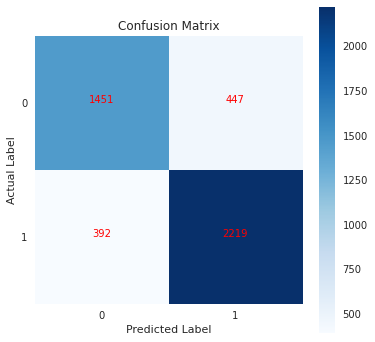

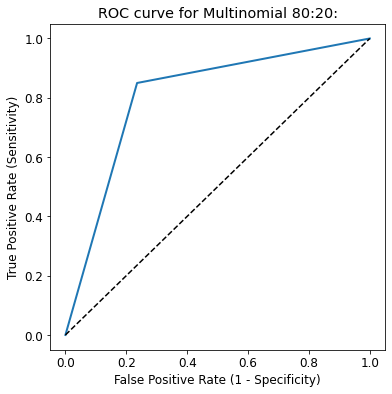

In [315]:
get_performance_metrics("Multinomial 80:20", mnb_80_20, X_train, X_test, y_train, y_test)

The statistics below are for Multinomial 10:90 model:
Multinomial 10:90 model accuracy for test data is 0.838738
Multinomial 10:90 model accuracy for train data is 0.823869
Precision Score = 0.8327829238824003
Recall Score = 0.8963155613350672
F1 Score = 0.8633820459290188



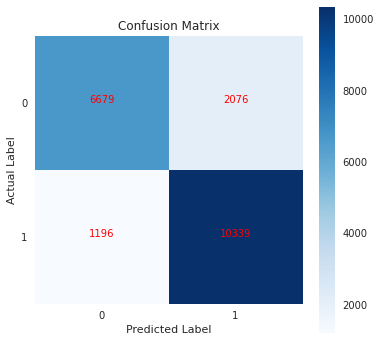

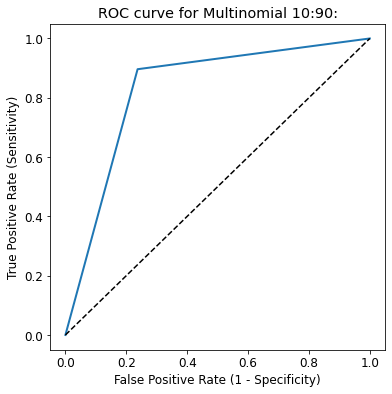

In [316]:
get_performance_metrics("Multinomial 10:90", mnb_10_90, X_train_9010, X_test_9010, y_train_9010, y_test_9010 )

The statistics below are for Gaussian Naive Bayes 80:20 model:
Gaussian Naive Bayes 80:20 model accuracy for test data is 0.793728
Gaussian Naive Bayes 80:20 model accuracy for train data is 0.796854
Precision Score = 0.8541966426858513
Recall Score = 0.7022870662460567
F1 Score = 0.770828824929669



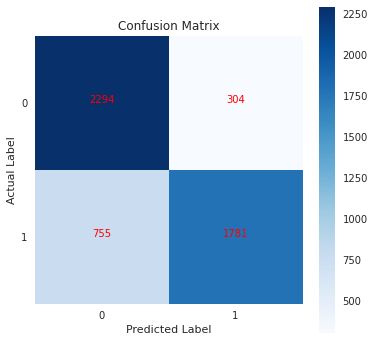

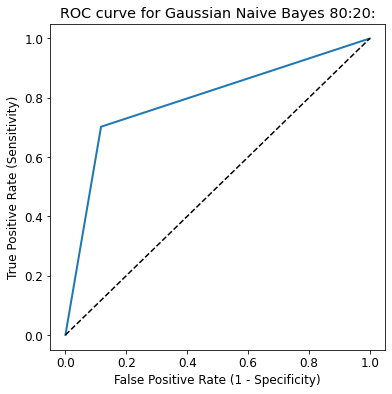

In [317]:
get_performance_metrics("Gaussian Naive Bayes 80:20", gnb_oversample, X_train_over, X_test_over,y_train_over,y_test_over)

The statistics below are for Bernoulli 80:20 model:
Bernoulli 80:20 model accuracy for test data is 0.883911
Bernoulli 80:20 model accuracy for train data is 0.880918
Precision Score = 0.9273127753303965
Recall Score = 0.8300473186119873
F1 Score = 0.8759883478984601



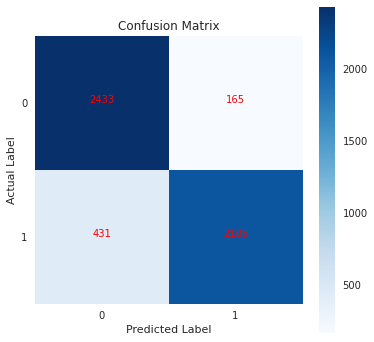

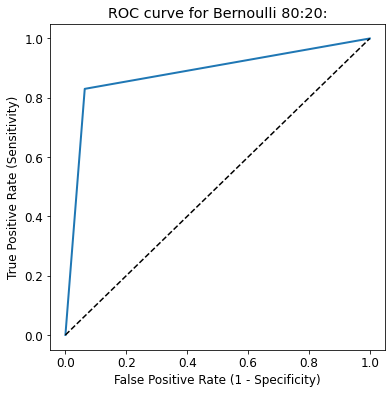

In [318]:
get_performance_metrics("Bernoulli 80:20", bnb_oversample, X_train_over, X_test_over,y_train_over,y_test_over)

The statistics below are for Multinomial 80:20 using oversampled data model:
Multinomial 80:20 using oversampled data model accuracy for test data is 0.578107
Multinomial 80:20 using oversampled data model accuracy for train data is 0.575151
Precision Score = 0.7863777089783281
Recall Score = 0.20031545741324921
F1 Score = 0.3192960402262728



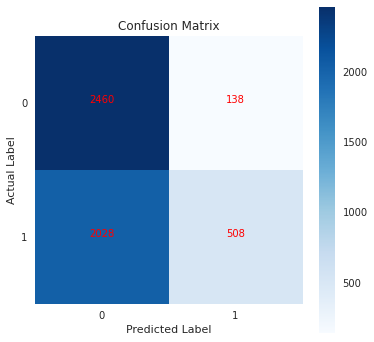

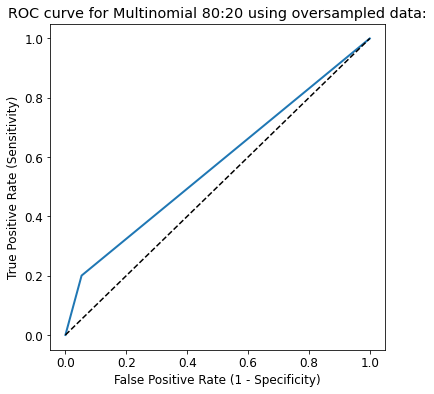

In [319]:
get_performance_metrics("Multinomial 80:20 using oversampled data", mnb_oversample, X_train_over, X_test_over,y_train_over,y_test_over)

The accuracy, recall and precision of the model goes down using the over sampled data set that we prepared in the Pre-Processing section. We can conclude that oversampling is not a proper technique for this dataset.

The statistics below are for Gaussian Naive Bayes 80:20 using undersampled data model:
Gaussian Naive Bayes 80:20 using undersampled data model accuracy for test data is 0.773488
Gaussian Naive Bayes 80:20 using undersampled data model accuracy for train data is 0.774152
Precision Score = 0.9146436961628818
Recall Score = 0.6023723568849922
F1 Score = 0.7263681592039801



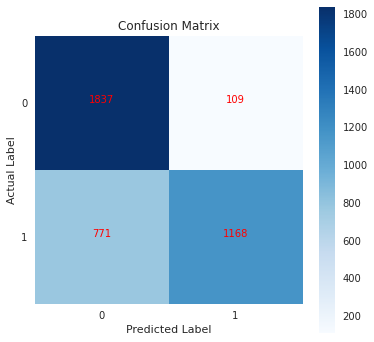

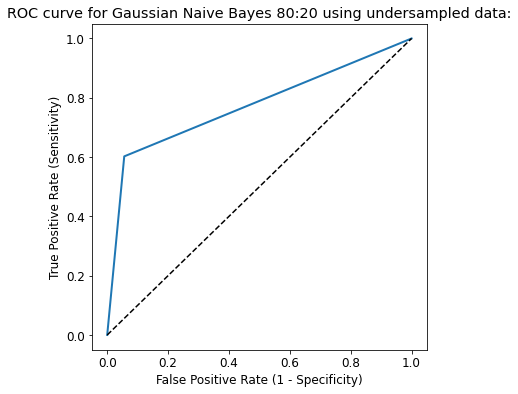

In [320]:
get_performance_metrics("Gaussian Naive Bayes 80:20 using undersampled data", gnb_undersample, X_train_under, X_test_under,y_train_under,y_test_under)

The statistics below are for Bernoulli 80:20 using undersampled data model:
Bernoulli 80:20 using undersampled data model accuracy for test data is 0.882883
Bernoulli 80:20 using undersampled data model accuracy for train data is 0.880608
Precision Score = 0.9182638105975197
Recall Score = 0.8401237751418257
F1 Score = 0.877457581470509



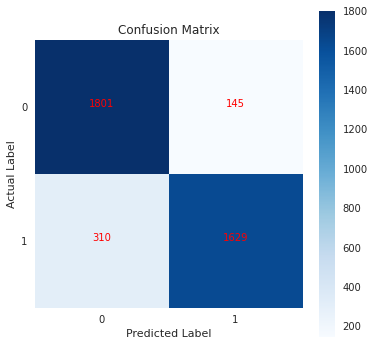

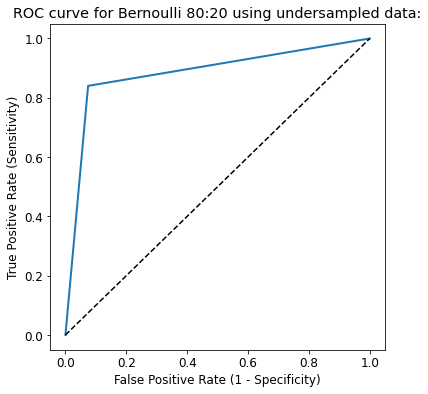

In [321]:
get_performance_metrics("Bernoulli 80:20 using undersampled data", bnb_undersample, X_train_under, X_test_under,y_train_under,y_test_under)

The statistics below are for Multinomial 80:20 using undersampled data model:
Multinomial 80:20 using undersampled data model accuracy for test data is 0.555470
Multinomial 80:20 using undersampled data model accuracy for train data is 0.553839
Precision Score = 0.7154471544715447
Recall Score = 0.1815368746776689
F1 Score = 0.2895927601809955



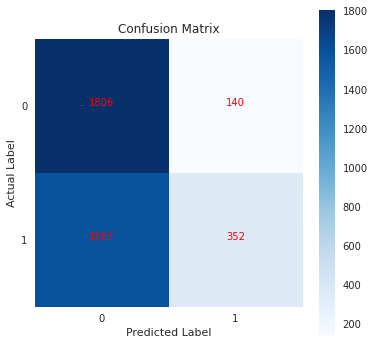

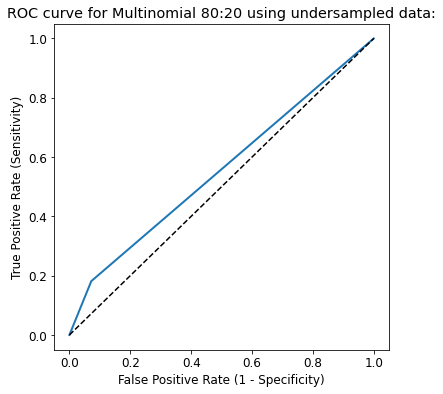

In [322]:
get_performance_metrics("Multinomial 80:20 using undersampled data", mnb_undersample, X_train_under, X_test_under,y_train_under,y_test_under)

## Summary of findings

**The** performance of model is given below:

|Model|Train/Test Split|Accuracy|Precision|Recall|F1 Score|
|---|---|---|---|---|---|
|Gaussian Naive Bayes (GNB) 80/20|80:20|82.3%|96.3%|71.96%|82.35%|
|Gaussian Naive Bayes (GNB) 10/90|10:90|82.6%|95.5%|72.9%|82.7%|
|Gaussian Naive Bayes (GNB) - Oversampled|80:20|80%|86.1%|70.45%|77.5%|
|Gaussian Naive Bayes (GNB) - Undersampled|80:20|79.5%|88.06%|67.07%|76.14%|
|Bernoulli (BNB) 80/20|80:20|87.2%|93.8%|83%|88.1%|
|Bernoulli (BNB) 10/90|10:90|87.5%|94.8%|82.7%|88.3%|
|Bernoulli (BNB) - Oversampled|80:20|88.4%|92.7%|82.7%|87.45%|
|Bernoulli (BNB) - Undersampled|80:20|88.4%|92.9%|82.5%|87.3%|
|Multinomial (MNB) 80/20|80:20|87.2%|83.7%|89.67%|86.6%|
|Multinomial (MNB) 10/90|10:90|79.9%|83.3%|81.03%|82.1%|
|Multinomial (MNB) - Oversampled|80:20|58.55%|79.8%|20.6%|32.74%|
|Multinomial (MNB) - Undersampled|80:20|55.9%|71.1%|16.2%|26.4%|

<h3>
1. In terms of recall i.e. the performance measure of choice, MultinomialNB provides the best performance and the preferred choice for the current problem. <br>
2. Oversampling and Undersampling is not improving the performance of the model much. Infact it makes the performance worse for Multinomial <br>
3. Bernoulli gives an allround better performance across accuracy, precision and recall. <br>
4. The difference in performance between 80:20 and 10:90 split is not much and it seems the models dont need too many records to come up with a resonable performance. <br>
</h3>